In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2023-02-05 09:12:39.699258: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-05 09:12:44.431678: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-05 09:12:44.431733: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-05 09:12:44.865098: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-05 09:13:02.501774: W tensorflow/stream_executor/platform/de

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 47s 4us/step


In [7]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
x_train.dtype

dtype('uint8')

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

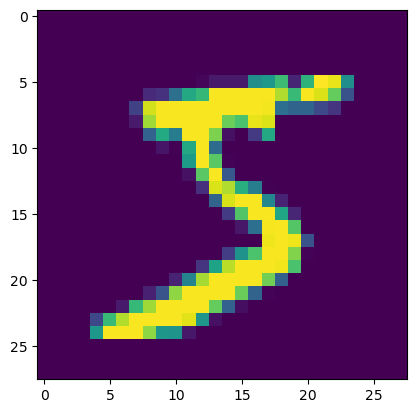

In [12]:
plt.imshow(x_train[0])

In [11]:
y_train[0]

5

In [15]:
x_train.shape[2]

28

In [28]:
x_train=x_train/255
x_test=x_test/255

In [29]:
x_train_flatten=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_train_flatten.shape

(60000, 784)

In [30]:
x_test_flatten=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
x_test.shape

(10000, 28, 28)

In [31]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
model=tf.keras.Sequential(
    tf.keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
)
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(x_train_flatten,y_train,epochs=5)

2023-02-05 09:37:44.269212: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4726 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3041 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2836 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2732 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9268


In [33]:
model.evaluate(x_test_flatten,y_test)

  1/313 [..............................] - ETA: 44s - loss: 0.2828 - accuracy: 0.9688

2023-02-05 09:39:01.867020: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 1ms/step - loss: 0.2666 - accuracy: 0.9260


[0.26659291982650757, 0.9259999990463257]

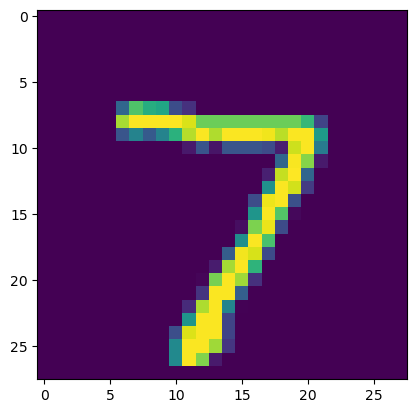

In [34]:
plt.imshow(x_test[0])

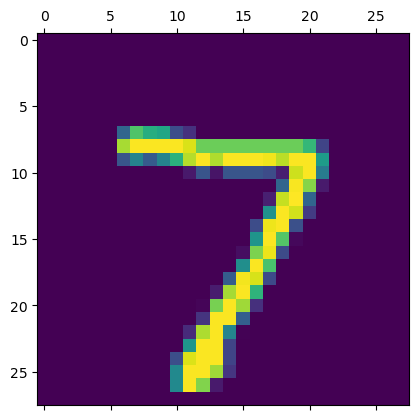

In [35]:
plt.matshow(x_test[0])

In [36]:
y_predicted=model.predict(x_test_flatten)

 51/313 [===>..........................] - ETA: 0s 

2023-02-05 09:42:16.150538: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 861us/step


In [38]:
y_predicted[0]*100

array([2.0013449e+00, 2.6668016e-05, 4.5088215e+00, 9.6507698e+01,
       1.9514358e-01, 1.1437301e+01, 1.8965425e-04, 9.9982574e+01,
       7.4431086e+00, 5.6949459e+01], dtype=float32)

In [40]:
np.argmax(y_predicted[0])

7

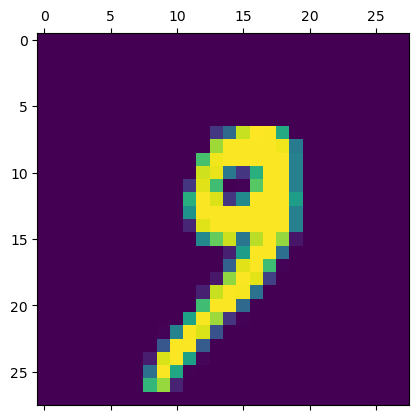

In [41]:
plt.matshow(x_test[1000])

In [42]:
np.argmax(y_predicted[1000])

9

In [44]:
y_predicted_label=[np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [46]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [47]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    7,    9,    2,    2,    0],
       [   0, 1111,    3,    2,    0,    2,    4,    2,   11,    0],
       [   4,    7,  928,   20,    7,    5,   13,   10,   33,    5],
       [   2,    0,   18,  938,    0,   15,    2,   10,   18,    7],
       [   1,    1,    6,    1,  910,    0,   12,    4,   10,   37],
       [   8,    1,    2,   43,    7,  772,   17,    7,   29,    6],
       [   9,    3,    6,    1,    7,   13,  914,    2,    3,    0],
       [   1,    5,   23,    9,    8,    1,    0,  953,    3,   25],
       [   5,    8,    7,   25,    9,   25,    9,   12,  868,    6],
       [  10,    7,    1,   14,   27,    5,    0,   28,    7,  910]],
      dtype=int32)>

<AxesSubplot:>

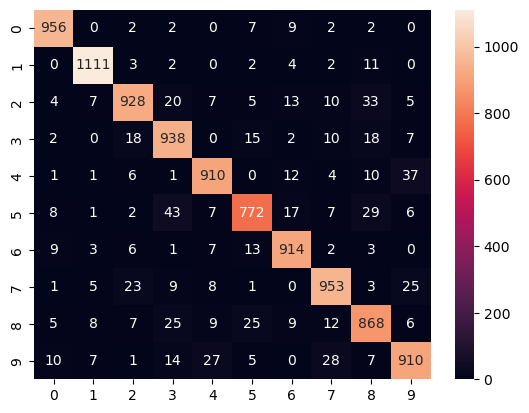

In [49]:
import seaborn as sns

sns.heatmap(cm,annot=True,fmt="d")

## neural network with 1 hidden layer

In [60]:
model_1_hidden=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0859 - accuracy: 0.9740
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0636 - accuracy: 0.9811
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0493 - accuracy: 0.9852
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0404 - accuracy: 0.9876
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0324 - accuracy: 0.9901


In [61]:
y_predicted2=model.predict(x_test)
y_predicted_label2=[np.argmax(i) for i in y_predicted2]
y_predicted_label2[:4]

313/313 [==============================] - 0s 1ms/step


[7, 2, 1, 0]

In [62]:
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

<AxesSubplot:>

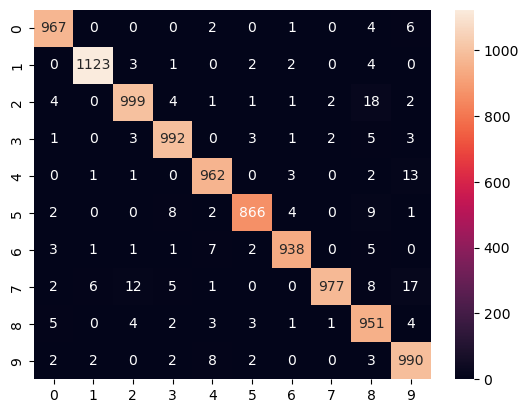

In [63]:
cm2=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label2)
sns.heatmap(cm2,annot=True,fmt="d")

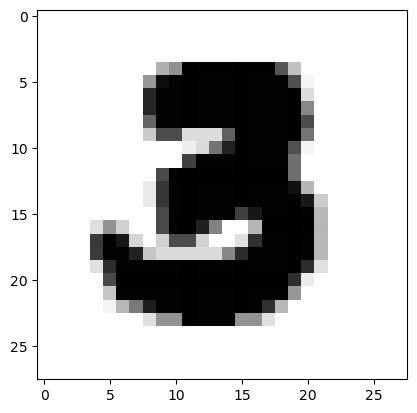

In [69]:
plt.imshow(x_test[200],cmap=plt.cm.binary)

In [70]:
y_predicted_label2[200]

3

# another way for this dataset

In [71]:
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [73]:
x_train=tf.keras.utils.normalize(x_train)
x_test=tf.keras.utils.normalize(x_test)

In [76]:
Model=tf.keras.Sequential()
Model.add(tf.keras.layers.Flatten())
Model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
Model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
Model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [79]:
Model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
Model.fit(x_train,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2627 - accuracy: 0.9213
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1064 - accuracy: 0.9671
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0721 - accuracy: 0.9768
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0541 - accuracy: 0.9829
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0422 - accuracy: 0.9863
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0340 - accuracy: 0.9891


In [80]:
val_loss,val_acc=Model.evaluate(x_test,y_test)
val_acc,val_loss

313/313 [==============================] - 1s 1ms/step - loss: 0.0771 - accuracy: 0.9778


(0.9778000116348267, 0.0771489143371582)

In [81]:
model.save("epic_num_reader.model")

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [82]:
new_model=tf.keras.models.load_model("epic_num_reader.model")

In [84]:
predict=new_model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [86]:
np.argmax(predict[0])

7